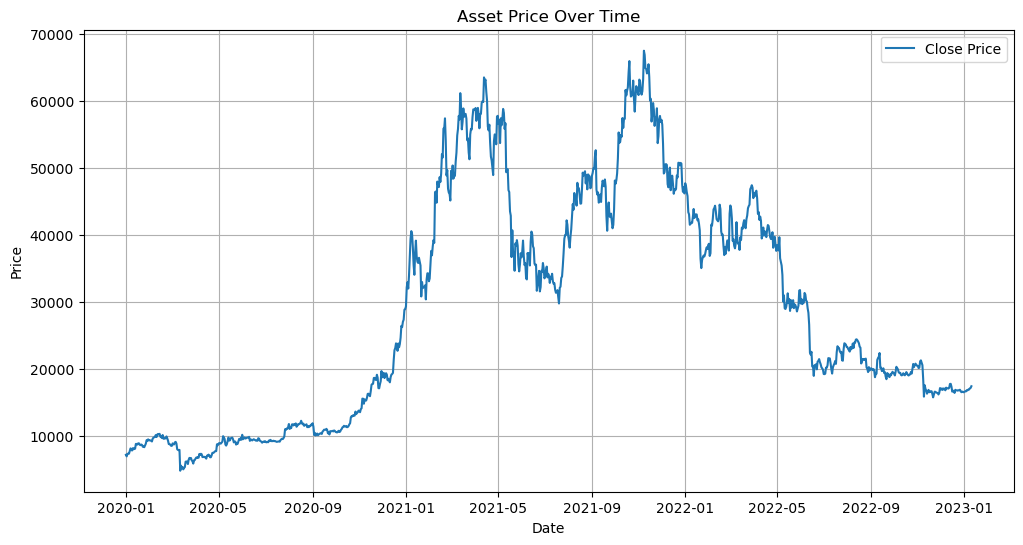

              Close          Open          High           Low
count   1106.000000   1106.000000   1106.000000   1106.000000
mean   28778.358951  28769.478481  29520.326492  27923.271519
std    17066.832431  17075.785319  17546.113853  16524.599183
min     4826.000000   4815.200000   5369.300000   3869.500000
25%    11710.275000  11686.100000  11827.325000  11470.850000
50%    23305.800000  23305.800000  24082.800000  22824.650000
75%    42813.775000  42810.200000  43903.725000  41829.350000
max    67527.900000  67528.700000  68990.600000  66334.900000


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# 加载CSV文件
file_path = './pv.csv'
data = pd.read_csv(file_path)

# 转换日期格式并按日期排序
data['Date'] = pd.to_datetime(data['Date'])
data_sorted = data.sort_values(by='Date').reset_index(drop=True)

# 将价格和成交量的列转换为数值格式
data_sorted['Close'] = data_sorted['Close'].str.replace(',', '').astype(float)
data_sorted['Open'] = data_sorted['Open'].str.replace(',', '').astype(float)
data_sorted['High'] = data_sorted['High'].str.replace(',', '').astype(float)
data_sorted['Low'] = data_sorted['Low'].str.replace(',', '').astype(float)

# 检查 Volume 列的数据格式，并在必要时转换
unique_volume_values = data_sorted['Volume'].unique()
# 如果 Volume 列的数据已经是数值格式，则不需要进一步处理

# 计算描述性统计数据
descriptive_stats = data_sorted.describe()

# 绘制价格(Close)的时间序列图
plt.figure(figsize=(12, 6))
plt.plot(data_sorted['Date'], data_sorted['Close'], label='Close Price')
plt.title('Asset Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# 显示描述性统计数据
print(descriptive_stats)


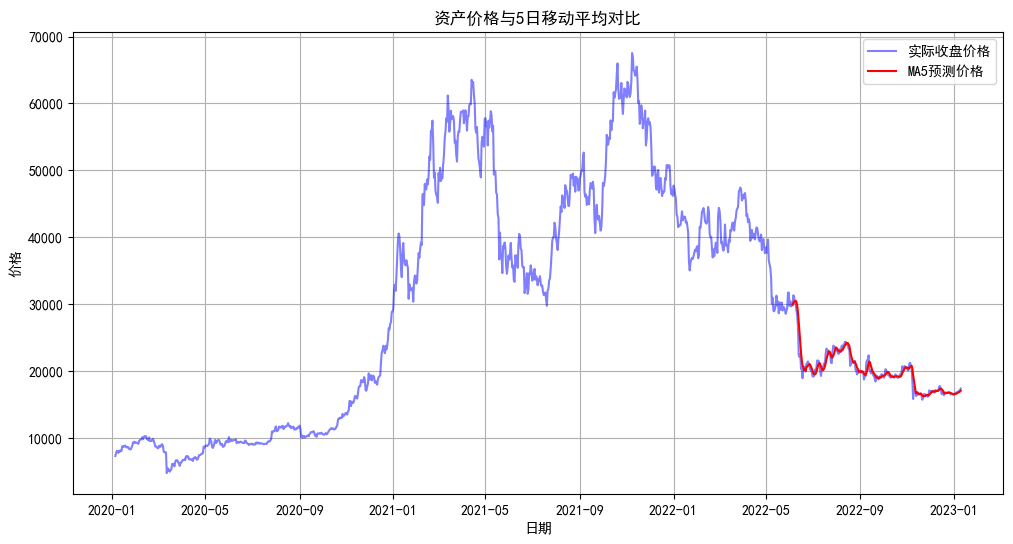

In [9]:
#MA 5:
# 设置移动平均参数 N = 5
N = 5

# 计算移动平均
data_sorted['MA5'] = data_sorted['Close'].rolling(window=N).mean()

# 为了进行预测，我们将分割数据为训练集和测试集
# 取最后20%的数据作为测试集
test_size = int(len(data_sorted) * 0.2)
train_data = data_sorted[:-test_size]
test_data = data_sorted[-test_size:]

# 准备训练和测试数据集
train_data_ma = train_data['MA5'].dropna()
train_data_ma_dates = train_data['Date'][N-1:]  # 忽略前N-1个NaN值
test_data_ma = test_data['MA5']

# 绘制训练数据和测试数据的移动平均

plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文支持的字体，如 'SimHei'
plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号

# 绘制原始数据和MA5的对比图

plt.figure(figsize=(12, 6))

# 绘制原始的收盘价格
plt.plot(data_sorted['Date'], data_sorted['Close'], label='实际收盘价格', color='blue', alpha=0.5)

# 绘制5日移动平均价格
plt.plot(test_data['Date'], test_data_ma, label='MA5预测价格', color='red')

plt.title('资产价格与5日移动平均对比')
plt.xlabel('日期')
plt.ylabel('价格')
plt.legend()
plt.grid(True)
plt.show()



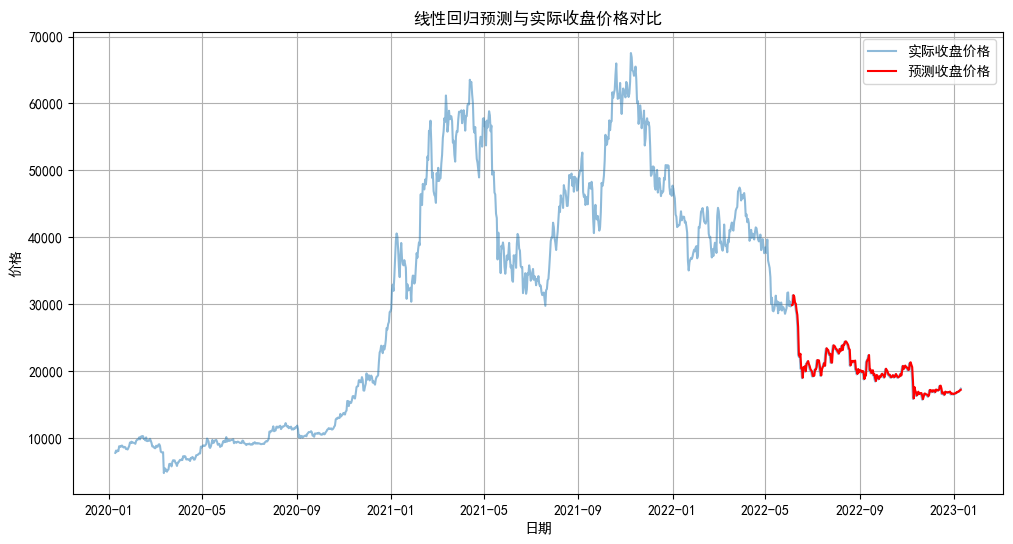

468806.4125723564

In [10]:
#线性回归模型
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# 使用线性回归模型进行预测
# 为了简化模型，我将使用收盘价的历史值来预测未来的收盘价

# 准备数据
# 创建一个特征，表示前一天的收盘价
data_sorted['Previous_Close'] = data_sorted['Close'].shift(1)
data_sorted.dropna(inplace=True)  # 删除由于shift产生的NaN值

# 分割数据为训练集和测试集
X = data_sorted[['Previous_Close']]
y = data_sorted['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 创建并训练模型
model = LinearRegression()
model.fit(X_train, y_train)

# 进行预测
y_pred = model.predict(X_test)

# 计算模型的均方误差
mse = mean_squared_error(y_test, y_pred)

# 绘制实际价格和预测价格的对比图
plt.figure(figsize=(12, 6))
plt.plot(data_sorted['Date'], data_sorted['Close'], label='实际收盘价格', alpha=0.5)
plt.plot(data_sorted.iloc[-len(y_test):]['Date'], y_pred, label='预测收盘价格', color='red')
plt.title('线性回归预测与实际收盘价格对比')
plt.xlabel('日期')
plt.ylabel('价格')
plt.legend()
plt.grid(True)
plt.show()

mse



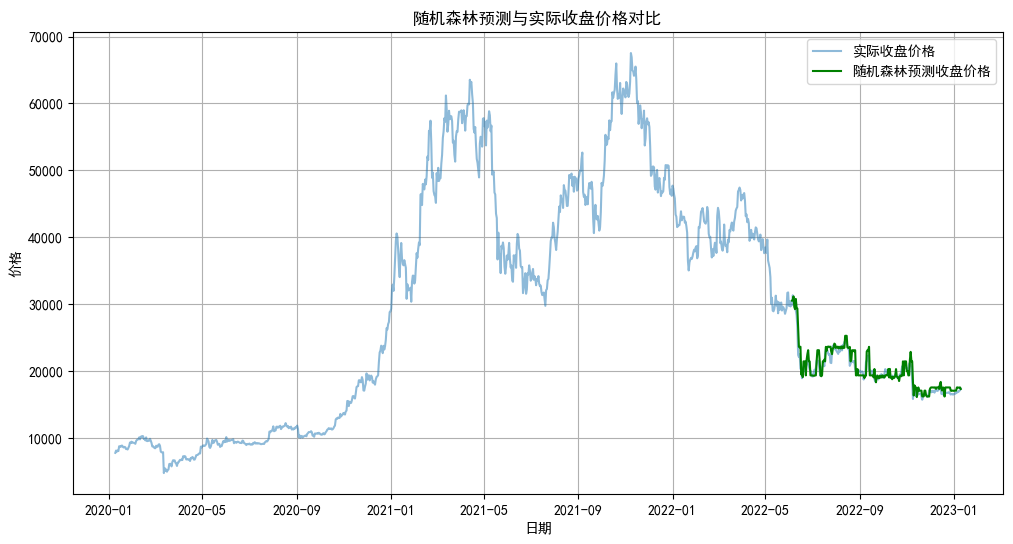

1027201.5572498527

In [11]:
from sklearn.ensemble import RandomForestRegressor

# 准备数据 - 使用与线性回归相同的数据
# 随机森林可以处理多个特征，但为了简单起见，仍然使用前一天的收盘价作为特征

# 创建并训练随机森林模型
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 进行预测
y_rf_pred = rf_model.predict(X_test)

# 计算模型的均方误差
rf_mse = mean_squared_error(y_test, y_rf_pred)

# 绘制实际价格和预测价格的对比图
plt.figure(figsize=(12, 6))
plt.plot(data_sorted['Date'], data_sorted['Close'], label='实际收盘价格', alpha=0.5)
plt.plot(data_sorted.iloc[-len(y_test):]['Date'], y_rf_pred, label='随机森林预测收盘价格', color='green')
plt.title('随机森林预测与实际收盘价格对比')
plt.xlabel('日期')
plt.ylabel('价格')
plt.legend()
plt.grid(True)
plt.show()

rf_mse

